In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

c:\Users\kapoo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r'landfill.csv')
df.head()

,ir_quality,temperature,humidity,methane,Smoke
0,80,95,4,51,1
1,98,69,5,40,1
2,61,97,2,49,1
3,40,44,25,12,0
4,42,42,33,13,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   ir_quality   100000 non-null  int64
 1   temperature  100000 non-null  int64
 2   humidity     100000 non-null  int64
 3   methane      100000 non-null  int64
 4   Smoke        100000 non-null  int64
dtypes: int64(5)
memory usage: 3.8 MB


In [4]:
df.isnull().sum()

ir_quality     0
temperature    0
humidity       0
methane        0
Smoke          0
dtype: int64

In [5]:
df.duplicated().sum()

11104

In [6]:
df.nunique()

ir_quality     82
temperature    81
humidity       66
methane        47
Smoke           2
dtype: int64

In [7]:
df.describe()

,ir_quality,temperature,humidity,methane,Smoke
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,57.71910,60.043420,16.861850,37.148430,0.617730
std,27.02745,23.379228,22.237566,23.878376,0.485944
min,0.00000,20.000000,2.000000,0.000000,0.000000
25%,41.00000,40.000000,3.000000,11.000000,0.000000
50%,59.00000,60.000000,5.000000,45.000000,1.000000
75%,80.00000,80.000000,23.000000,58.000000,1.000000
max,100.00000,100.000000,85.000000,70.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20773af3880>,
 'caps': [<matplotlib.lines.Line2D at 0x20773af3dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20773af35e0>,
 'medians': [<matplotlib.lines.Line2D at 0x20773b05340>,
 'fliers': [<matplotlib.lines.Line2D at 0x20773b055e0>,
 'means': []}

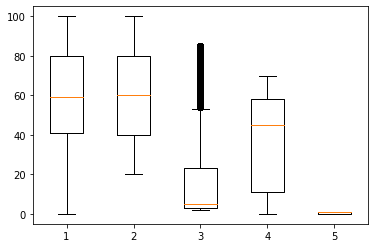

In [11]:
plt.boxplot(df)

In [12]:
Q1 = df.humidity.quantile(0.25)
Q3 = df.humidity.quantile(0.75)
Q1, Q3

(3.0, 23.0)

In [13]:
IQR = Q3 - Q1
IQR

20.0

In [14]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-27.0, 53.0)

In [17]:
df[(df.humidity<lower_limit)|(df.humidity>upper_limit)]

ir_quality     12065
temperature    12065
humidity       12065
methane        12065
Smoke          12065
dtype: int64

In [24]:
new_df_cap = df.copy()

new_df_cap['humidity'] = np.where(
    new_df_cap['humidity'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['humidity'] < lower_limit,
        lower_limit,
        new_df_cap['humidity']
    )
)

In [25]:
new_df_cap

,ir_quality,temperature,humidity,methane,Smoke
0,80,95,4.0,51,1
1,98,69,5.0,40,1
2,61,97,2.0,49,1
3,40,44,25.0,12,0
4,42,42,33.0,13,0
...,...,...,...,...,...
99995,71,75,4.0,54,1
99996,70,91,3.0,58,1
99997,94,58,3.0,42,1
99998,93,66,4.0,60,1


In [26]:
new_df_cap.corr()

,ir_quality,temperature,humidity,methane,Smoke
ir_quality,1.000000,0.760193,-0.869535,0.808192,0.814937
temperature,0.760193,1.000000,-0.799499,0.818063,0.841982
humidity,-0.869535,-0.799499,1.000000,-0.834502,-0.828975
methane,0.808192,0.818063,-0.834502,1.000000,0.948945
Smoke,0.814937,0.841982,-0.828975,0.948945,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20774cb1070>,
 'caps': [<matplotlib.lines.Line2D at 0x20774cb15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20774c9fd90>,
 'medians': [<matplotlib.lines.Line2D at 0x20774cb1af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20774cb1d90>,
 'means': []}

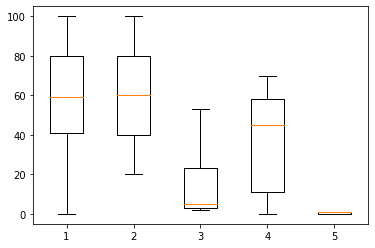

In [27]:
plt.boxplot(new_df_cap)

In [28]:
x=new_df_cap.drop('Smoke',axis=1)
x.head()

,ir_quality,temperature,humidity,methane
0,80,95,4.0,51
1,98,69,5.0,40
2,61,97,2.0,49
3,40,44,25.0,12
4,42,42,33.0,13


In [29]:
y=df['Smoke']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Smoke, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.46525250722163874

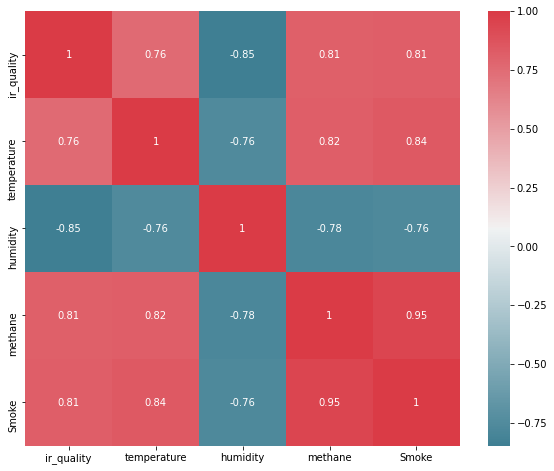

In [32]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [33]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor)

Mean Absolute Error: 0.12209890326077548
Mean Squared Error: 0.01980029504842984
Root Mean Squared Error: 0.14071352119974057
Mean Absolute Error: 0.043935281736650005
Mean Squared Error: 0.002819127677413291
Root Mean Squared Error: 0.0530954581618173


In [34]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [35]:
#Saving Scikitlearn models
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(supportvector_regressor,file)

In [36]:
with open('model_pickle','rb') as file:
    bmp = pickle.load(file)

In [37]:
bmp.predict(X_test)

array([0.0901702 , 1.08527945, 0.95891063, ..., 0.09019317, 1.04145875,
       0.08880103])

In [38]:
bmp.score(X_test,y_test)

0.9880708552025